In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
url = "/Users/anushavan/Desktop/Study/Data_Science/Springboard/Capstone_1/data/cleaned_data.csv"

data = pd.read_csv(url, parse_dates=['Fully Paid','Approved','Signoff_Date'])

In [4]:
small = data.sample(frac=0.01)

### Analysis of data

Creating:
1. histograms (for categorical variables)
2. bar charts (for continuous variables) and 
3. boxplots for categorical variables (x axis) and a continuous variable (y axis).


In [5]:
data.head(2)

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158.0,-0.035313
1,1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,...,Other,NaN,NaN,MX-8,GW,N,198951,NaT,352.0,0.711858


In [6]:
# average number of building permit issued since 2000:
average = data.count()['Borough']/5

# average number of building permit issued per year 
years = (data['Fully Paid'].max() - data['Fully Paid'].min()).days/365

# average number of building permits issued per year per Borough
boro_year_average = average/years

,Borough
MANHATTAN,2224
BRONX,7417
STATEN ISLAND,11359
BROOKLYN,17062
QUEENS,21014


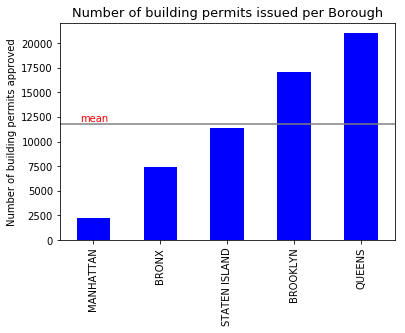

In [7]:
# create a histogram for the # of building permits issued by Borough
fig, ax = plt.subplots(figsize=(6,4))
average = (data.count()/5)['Borough']
ax = data['Borough'].value_counts().sort_values().plot(kind='bar', color = 'b')
data.groupby(['Borough']).count()
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')
plt.axhline(y=average, c='grey')
plt.annotate('mean', xy=(1, 10000), xytext=(-0.2, 12000), color='r')
plt.title('Number of building permits issued per Borough', fontsize=13)
pd.DataFrame(data['Borough'].value_counts(ascending=True))


* There were almost 10x more building permits issued in Queens (21,014) than in Manhattan (2,224). 
* The average of 5 Boroughs is 11,815 building permits total (since 2000) or about 610 permits on average per year in each boro.  

,mean,std,max
Borough,,,
BRONX,165.0,254.0,3478.0
BROOKLYN,179.0,227.0,2762.0
MANHATTAN,333.0,336.0,3585.0
QUEENS,154.0,237.0,3637.0
STATEN ISLAND,143.0,315.0,4959.0


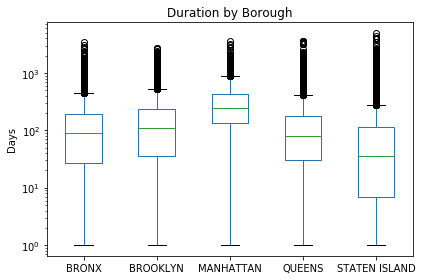

In [8]:
# Create a boxplot of duration of issuance of building permit by Borough.
ax = data.boxplot(column=['Duration'], by=['Borough'])
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.grid(False)
ax.set_title('Duration by Borough')
ax.set_yscale('log')
plt.tight_layout()
pd.DataFrame(data.groupby('Borough')['Duration'].
             describe().loc[:,['mean','std','max']].round())

#### Duration of building permit issuance by Borough

* On average it takes the longest in Manhattan and shortest in Staten Island to obtain a building permit. 
* In Manhattan, it takes on average 11 months (333 days) to obtain a building permit, which is almost twice as long as in the rest of the 4 Boroughs. 
* However, there is also significant variance in Manhattan in the duration. 

In [9]:
bldg_type = pd.DataFrame(data.groupby(['Borough','Building Type']).count()['Approved'])

In [10]:
bldg_type_piv = (pd.pivot_table
                 (bldg_type, index='Borough', columns=['Building Type'], 
                  values='Approved').sort_values(by='1-2-3 FAMILY'))

In [11]:
# Create subplot consisting of 3 plots:
# 1. Number of building permits issued in each borough by building type.
# 2. Duration of building permits issued in each borough by building type.
# 3. Total amount of building permits issued by type (no borough)

In [12]:
group = pd.DataFrame(data.groupby(['Borough','Building Type'])['Duration'].mean())

In [13]:
group_piv = pd.pivot_table(index='Borough', columns='Building Type', 
                          values='Duration', data=group)

,mean,std,max
Building Type,,,
1-2-3 FAMILY,138.0,248.0,4959.0
OTHERS,241.0,274.0,3637.0


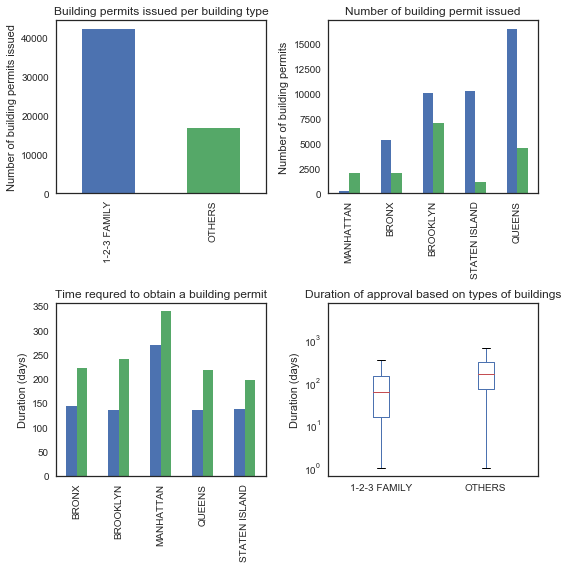

In [238]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(2,2,1)
data['Building Type'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Number of building permits issued')
ax1.set_title('Building permits issued per building type')

ax2 = fig.add_subplot(2,2,2)
bldg_type_piv.plot(kind='bar', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Number of building permits')
ax2.set_title('Number of building permit issued')
ax2.legend('')

ax3 = fig.add_subplot(2,2,3)
group_piv[['1-2-3 FAMILY','OTHERS']].plot(kind='bar', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Duration (days)')
ax3.set_title('Time requred to obtain a building permit')
ax3.legend('')

ax4 = fig.add_subplot(2,2,4)
data.boxplot(column=['Duration'], by=['Building Type'], ax = ax4)
ax4.set_title('Duration of approval based on types of buildings')
ax4.set_xlabel('')
ax4.set_ylabel('Duration (days)')
ax4.set_yscale('log')
ax4.grid(False)

plt.suptitle('')
plt.tight_layout()

pd.DataFrame(data.groupby('Building Type')['Duration'].
             describe().loc[:,['mean','std','max']].round())

#### Discussion: the type of buildings approved 

* The majority (>70%) of building permits were issued for 1,2 or 3 family buildings. This ratio varies significantly across the 5 Boroughs. 
* Manhattan is the only borough where the majority of the building permits where issued for the "Others" category, meaning anything other than 1,2 or 3 family houses. 
* The duration for obtaining a building permit is longer for "Others" category buildings than "1, 2 or 3 family" houses, by on average 79 days. 


In [256]:
# Pivot the data to get borough level duration for applicants that applied online vs those who 
# did not apply online.

efile_boro = data.groupby(['Borough','Efiling Filed'])['Duration'].mean()
efile_pivot = pd.pivot_table(pd.DataFrame(efile_boro), 
                             index='Borough', columns='Efiling Filed')

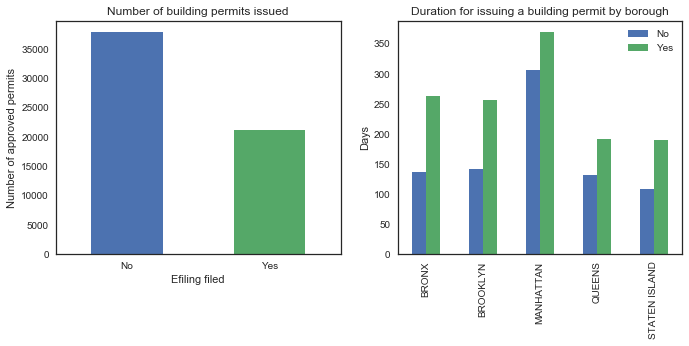

In [294]:
# Create a bar plot of Efiling.
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)

data['Efiling Filed'].value_counts().plot(kind='bar', ax=ax1)
# ax1.set_xticklabels(['Yes','No'],rotation=360)
ax1.set_title('Number of building permits issued')
ax1.set_ylabel('Number of approved permits')
ax1.set_xlabel('Efiling filed')
ax1.set_xticklabels(['No','Yes'], rotation=360)

# plt.tight_layout()
# pd.DataFrame(data.groupby('Borough')['Efiling Filed'].mean())

ax2 = fig.add_subplot(1,2,2)
pd.pivot_table(pd.DataFrame(efile_boro), 
               index='Borough', columns='Efiling Filed').plot(kind='bar', ax=ax2)
# ax2.set_xticklabels(['No','Yes'], rotation=360)
ax2.set_title('Duration for issuing a building permit by borough')
ax2.set_ylabel('Days')
ax2.set_xlabel('')
ax2.legend(['No','Yes'])

,mean,std,max
Efiling Filed,,,
N,136.0,251.0,4959.0
Y,222.0,265.0,3585.0


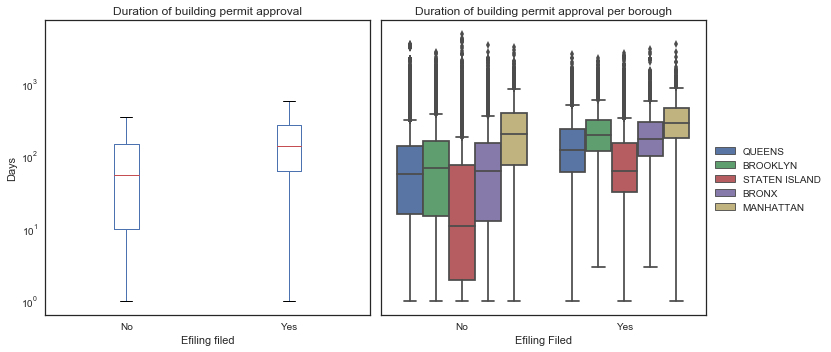

In [240]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
data.boxplot(column=['Duration'], by=['Efiling Filed'], ax=ax1)
ax1.set_title('Duration of building permit approval')
ax1.set_ylabel('Days')
ax1.set_xlabel('Efiling filed')
ax1.set_xticklabels(['No','Yes'])
ax1.set_yscale('log')
plt.suptitle('')
ax1.grid(False)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2, sharey=ax1)
sns.boxplot(x='Efiling Filed', y='Duration',data=data, hue='Borough', ax=ax2, order=['N','Y'])
ax2.set_xticklabels(['No','Yes'])
ax2.set_title('Duration of building permit approval per borough')
ax2.legend(bbox_to_anchor=(1, 0.6))
ax2.yaxis.set_visible(False)
# ax2.axvline(0.5, c='k', linewidth=0.7)

pd.DataFrame(data.groupby(['Efiling Filed'])['Duration'].
             describe().loc[:,['mean','std','max']].round())

#### Discussion: E-filing for building permits
* The applicants that have NOT filed the application online seem to obtain the approval faster. We need to explore this further to understand the reason. 
* Looking into the data by borough we can see that this is true for all boroughs. However, the difference is very small in Manhattan.

,Applicant Professional Title
RA,44086
PE,14990


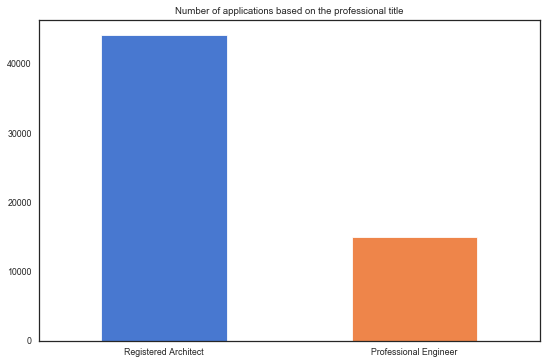

In [348]:
# Create a bar chart of Professional Title and include a statistical analysis.

plt.style.use('seaborn-white')

plt.style.use('seaborn-white')
fig, ax = plt.subplots()
data['Applicant Professional Title'].value_counts().plot(kind='bar', ax = ax)
ax.set_xticklabels(['Registered Architect', 'Professional Engineer'],rotation=360)
ax.set_title('Number of applications based on the professional title')
pd.DataFrame(data['Applicant Professional Title'].value_counts())


Applicant Professional Title
PE    66.0
RA    89.0
Name: Duration, dtype: float64

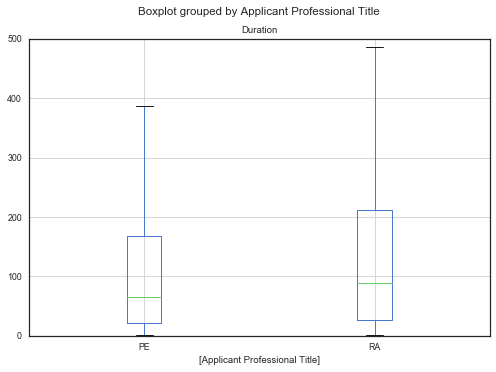

In [380]:
data.boxplot(column=['Duration'], by=['Applicant Professional Title'])
plt.ylim(0,500)
data.groupby('Applicant Professional Title')['Duration'].median()

,mean,std,max
Applicant Professional Title,,,
PE,143.0,229.0,4959.0
RA,176.0,269.0,4411.0


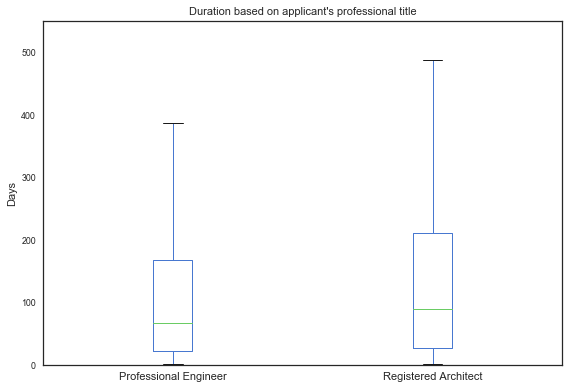

In [374]:
# Boxplot of Duration based on the applicants' professional title.
fig, ax = plt.subplots()
data.boxplot(column=['Duration'], by=['Applicant Professional Title'], ax=ax)
ax.set_xticklabels(['Professional Engineer','Registered Architect'], fontsize=11)
plt.suptitle("")
ax.set_title("Duration based on applicant's professional title", fontsize=11)
ax.set_xlabel('')
ax.set_ylabel('Days', fontsize=11)
ax.set_ylim(0,550)
ax.grid(False)
plt.tight_layout()
pd.DataFrame(data.groupby('Applicant Professional Title')['Duration'].
             describe().loc[:,['mean','std','max']].round())

,Professional Cert
N,38010
Y,21066


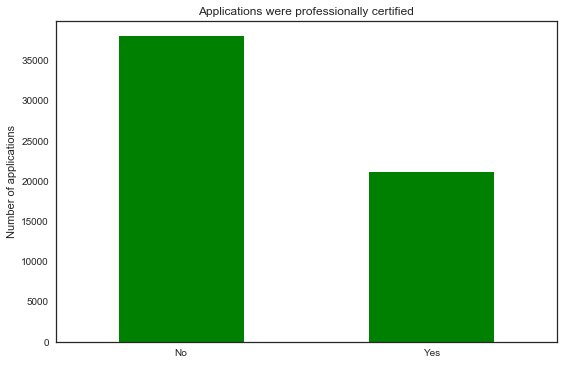

In [297]:
# Bar chart indicating whether or not the application was submitted as 
# Professionally Certified by a Professional Engineer (PE) or Registered Architect (RA).
ax = data['Professional Cert'].value_counts().plot(kind='bar')
ax.set_xticklabels(['No','Yes'],rotation=360)
ax.set_title('Applications were professionally certified')
ax.set_ylabel('Number of applications')
pd.DataFrame(data['Professional Cert'].value_counts())

,mean,std,max
Professional Cert,,,
N,225.0,283.0,4959.0
Y,62.0,166.0,2589.0


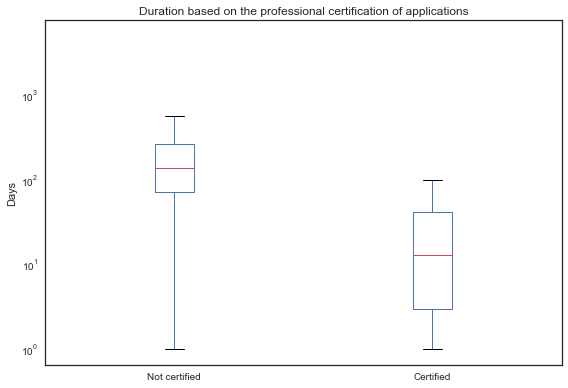

In [298]:
# Boxplot of Duration based on wheather or not the applications were professionally certified.
ax = data.boxplot(column=['Duration'], by=['Professional Cert'])
ax.set_xticklabels(['Not certified','Certified'])
plt.suptitle('')
ax.set_title("Duration based on the professional certification of applications")
ax.set_xlabel('')
ax.set_ylabel('Days')
ax.set_yscale('log')
ax.grid(False)
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
pd.DataFrame(data.groupby('Professional Cert')['Duration'].
             describe().loc[:,['mean','std','max']].round())


### Discuss the result above. 

,Total Est. Fee
mean,3950.0
std,84871.0
50%,614.0


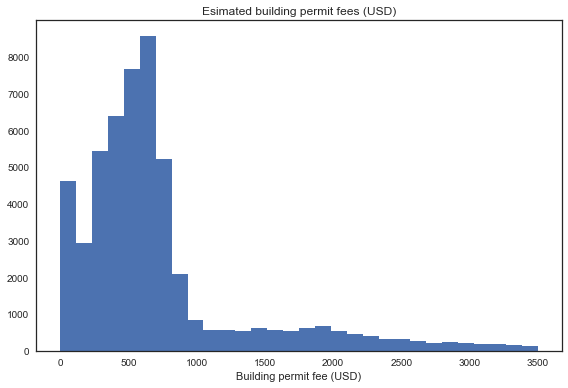

In [299]:
# Histogram of building permit fee () 
ax = data['Total Est. Fee'].hist(bins=30, range=(0,3500))
ax.set_title('Esimated building permit fees (USD)')
ax.set_xlabel('Building permit fee (USD)')
ax.grid(False)
plt.tight_layout()
pd.DataFrame(data['Total Est. Fee'].describe().loc[['mean','std','50%']].round())


#### Add a scatter plot building permit fee vs duration and the corr value

,mean,std,max
Borough,,,
STATEN ISLAND,143.0,315.0,4959.0
QUEENS,154.0,237.0,3637.0
BRONX,165.0,254.0,3478.0
BROOKLYN,179.0,227.0,2762.0
MANHATTAN,333.0,336.0,3585.0


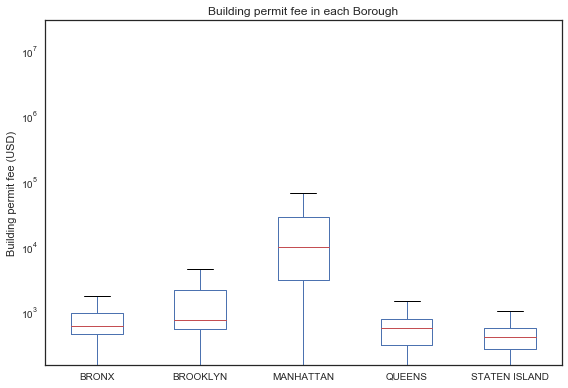

In [300]:
# Boxplot of building permit fee (estimated) in each borough.
ax = data.boxplot(column='Total Est. Fee', by='Borough')
ax.set_yscale('log')
ax.grid(False)
ax.set_title('Building permit fee in each Borough')
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Building permit fee (USD)')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
(data.groupby('Borough')['Duration'].describe().
 round().loc[:,['mean','std','max']].sort_values('mean'))

In [301]:
data.groupby('Borough')['Duration'].mean()

Borough
BRONX            165.453553
BROOKLYN         179.011253
MANHATTAN        333.200540
QUEENS           153.594461
STATEN ISLAND    143.106171
Name: Duration, dtype: float64

In [302]:
data.head()

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158.0,-0.035313
1,1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,...,Other,NaN,NaN,MX-8,GW,N,198951,NaT,352.0,0.711858
2,3,QUEENS,1-2-3 FAMILY,Y,RA,N,2013-03-06,2015-05-29,1619.08,7470,...,R1-2,NaN,NaN,NaN,NaN,N,12159,NaT,814.0,2.491204
3,4,QUEENS,1-2-3 FAMILY,Y,RA,Y,2018-11-05,2019-01-31,100.00,300,...,R4-1,NaN,NaN,NaN,NaN,N,300,NaT,87.0,-0.308763
4,11,BROOKLYN,OTHERS,Y,RA,N,2014-06-14,2014-12-24,2209.84,5994,...,R6B,NaN,NaN,NaN,NaN,N,7884,2018-05-25,193.0,0.099486


/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


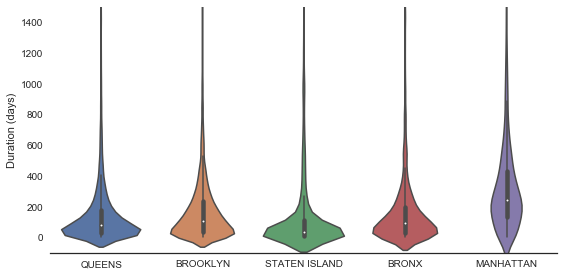

In [303]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(style='white')
ax = sns.violinplot(x='Borough', y='Duration', data=data)
plt.ylabel('Duration (days)')
plt.xlabel('')
plt.legend(loc='upper left')
ax.set_ylim(-100,1500)
sns.despine(left=True)
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean of duration per Borough\n           (black line shows 95% confidence interval around the mean)')

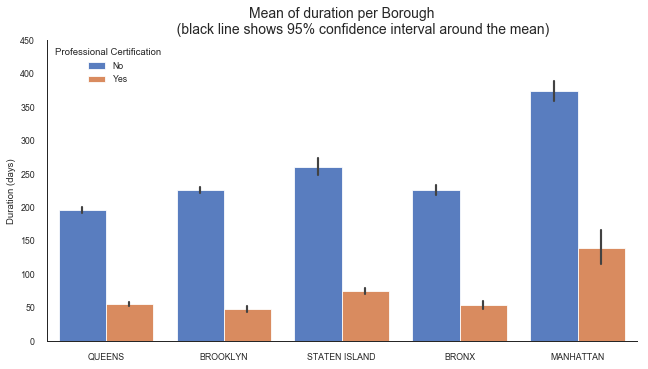

In [304]:
sns.set(style='white', palette='muted')
sns.set_context('paper')
g = sns.catplot(x ='Borough', y ='Duration', 
                  hue='Professional Cert', data=data, kind='bar', 
                ci=95, legend_out=False)
g.fig.set_size_inches(10,5)
g.set_axis_labels('','Duration (days)')
g.ax.set_ylim(0,450)
g.ax.set_xlabel('')
legend = plt.legend(title='Professional Certification', loc='upper left', frameon=False)

plt.setp(legend.get_texts()[0], text='No')
plt.setp(legend.get_texts()[1], text='Yes')
plt.title('Mean of duration per Borough' '\n \
          (black line shows 95% confidence interval around the mean)', fontsize=14)

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Duration
Total Est. Fee,0.028


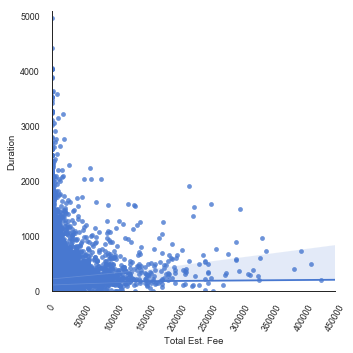

In [305]:
# scatterplot of building permit fee and Duration. 
sns.lmplot(x='Total Est. Fee', y='Duration', data=data)
plt.xlim(0,450000)
plt.ylim(0,5080)
plt.xticks(rotation=60)
plt.tight_layout()
data.corr().loc[['Total Est. Fee'],['Duration']].round(3)

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Proposed zoning area and the approval duration')

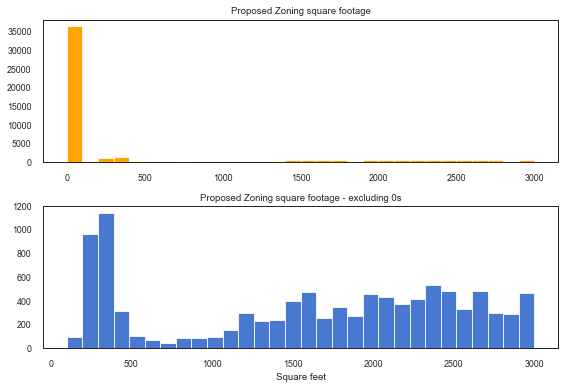

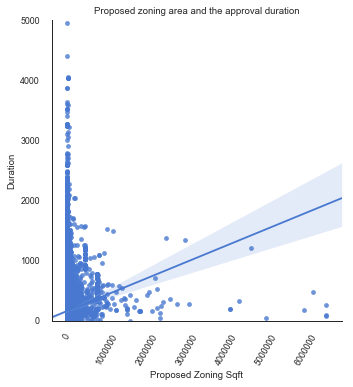

In [306]:
# Histogram of Proposed Zoning square footage. 
fig, ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Proposed Zoning Sqft'].hist(bins=30, range=(0,3000), color='orange')
ax.set_title('Proposed Zoning square footage')
# ax.set_xlabel('Square feet')
ax.grid(False)
pd.DataFrame((data['Proposed Zoning Sqft']).describe()).round(1)

plt.subplot(2,1,2)
ax1 = data['Proposed Zoning Sqft'].hist(bins=30, range=(100,3000))
ax1.set_title('Proposed Zoning square footage - excluding 0s')
ax1.set_xlabel('Square feet')
ax1.grid(False)
plt.tight_layout()

# scatterplot of proposed zoning square feet vs Duration.
sns.lmplot(x='Proposed Zoning Sqft', y='Duration', data=data)
plt.tight_layout()
# plt.xscale('log')
plt.ylim(0,5000)
plt.xticks(rotation=60)
plt.title('Proposed zoning area and the approval duration')

,Proposed No. Of Stories
count,59076.0
mean,3.3
std,4.1
min,0.0
25%,2.0
50%,3.0
75%,3.0
max,212.0


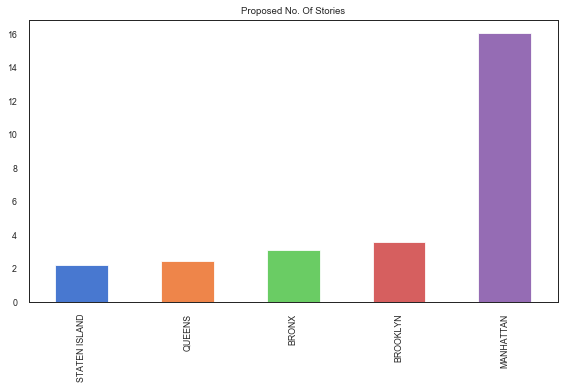

In [307]:
# Histogram of Proposed No. Of Stories. 

# DO A BAR PLOT INSTEAD OF HIST

ax = small.groupby('Borough')['Proposed No. Of Stories'].mean().sort_values().plot(kind='bar')
ax.set_title('Proposed No. Of Stories')
ax.set_xlabel('')
ax.grid(False)
plt.tight_layout()
pd.DataFrame((data['Proposed No. Of Stories']).describe()).round(1)



[(0, 2000), (0, 120)]

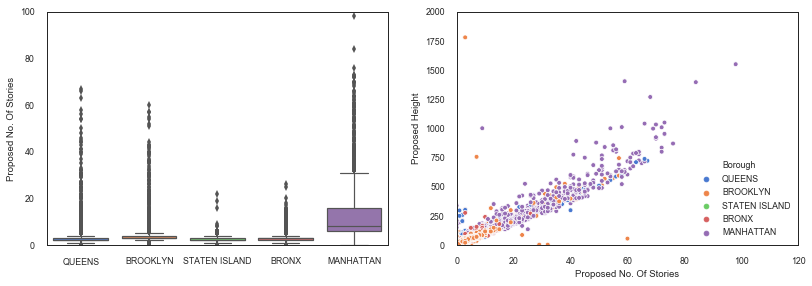

In [308]:
# Boxplot of Proposed No. Of Stories in each borough.
f, axes = plt.subplots(1, 2, figsize=(12, 4)) #sharey=True)
sns.boxplot(data=data,x='Borough', y='Proposed No. Of Stories', ax=axes[0])
axes[0].set(ylim=(0,100))
axes[0].set_xlabel('')
# plt.tight_layout()
sns.scatterplot(data=data,x='Proposed No. Of Stories', y='Proposed Height', hue='Borough',
                ax = axes[1])
axes[1].set(xlim=(0,120), ylim=(0,2000))
# axes[1].set_xlabel('')

[(0, 30)]

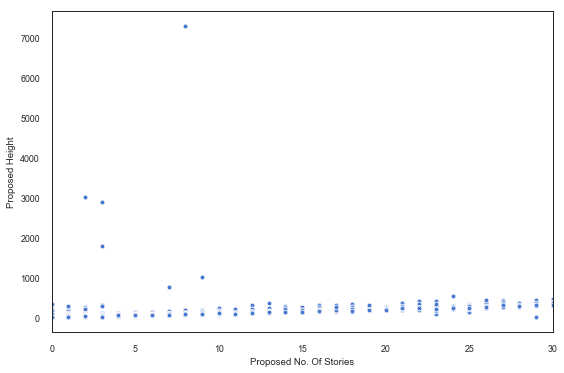

In [309]:
ax = sns.scatterplot(data=data, x= 'Proposed No. Of Stories', y='Proposed Height')
ax.set(xlim=(0,30))


In [310]:
(data[data['Proposed Height'] > 2000].
 iloc[:,7:][['Proposed Height','Proposed No. Of Stories',
             'Total_Construction_Floor_Area','Duration']])

,Proposed Height,Proposed No. Of Stories,Total_Construction_Floor_Area,Duration
23033,7310,8,59456,1.0
37824,3024,2,2625,118.0
45762,2903,3,8857,46.0


In [311]:
data.head(2)

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158.0,-0.035313
1,1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,...,Other,NaN,NaN,MX-8,GW,N,198951,NaT,352.0,0.711858


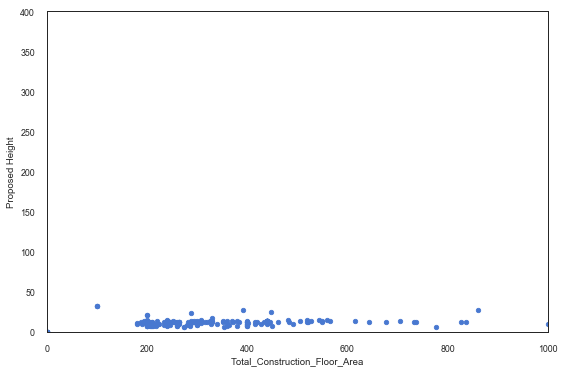

In [312]:
(data[data['Duration'] == 1].
 plot(kind='scatter', x='Total_Construction_Floor_Area', y='Proposed Height', ylim=(0,400),
     xlim=(0,1000)))

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-0.882,0.5,'Duration (days)')

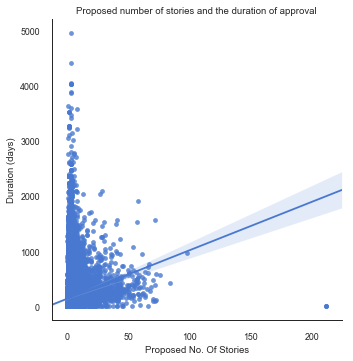

In [314]:
# scatterplot of proposed number of stories and duration.

sns.lmplot(x='Proposed No. Of Stories', y='Duration', data=data)
plt.title('Proposed number of stories and the duration of approval')
plt.ylabel('Duration (days)')

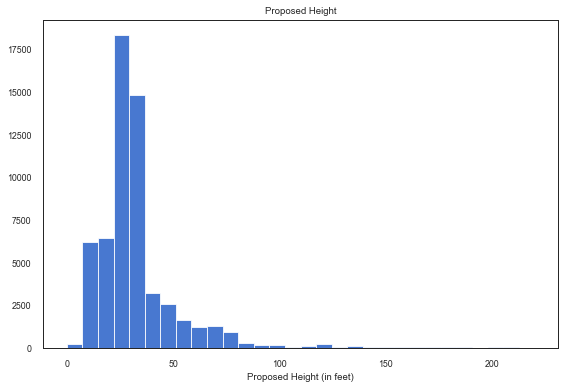

In [315]:
# Histogram of Proposed Height. 
ax = data['Proposed Height'].hist(bins=30, range=(0,220))
ax.set_title('Proposed Height')
ax.set_xlabel('Proposed Height (in feet)')
ax.grid(False)
pd.DataFrame((data['Proposed Height']).describe()).round(1)
plt.tight_layout()

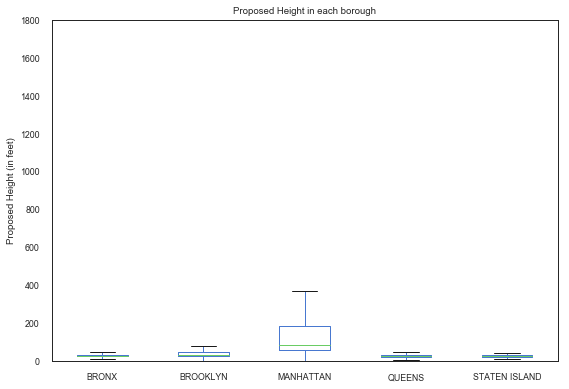

In [316]:
# Boxplot of Proposed Height in each borough. 
# ax = sns.boxplot(data=data,x='Borough', y='Proposed Height')
ax = data.boxplot(column='Proposed Height', by='Borough')
ax.set(ylim=(0,400))
ax.set_xlabel('')
ax.set_ylabel('Proposed Height (in feet)')
ax.set_title('Proposed Height in each borough')
plt.suptitle('')
ax.grid(False)
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 5100)

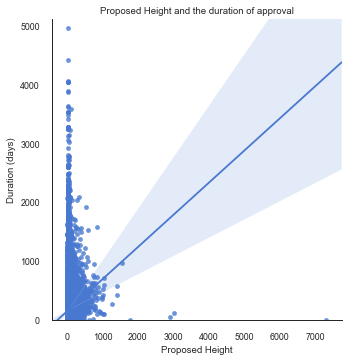

In [317]:
# scatterplot of proposed height and duration.

sns.lmplot(x='Proposed Height', y='Duration', data=data)
plt.title('Proposed Height and the duration of approval')
plt.ylabel('Duration (days)')
plt.ylim(0,5100)

,Proposed Dwelling Units
count,50387.0
mean,10.1
std,103.1
min,0.0
25%,1.0
50%,2.0
75%,3.0
max,21240.0


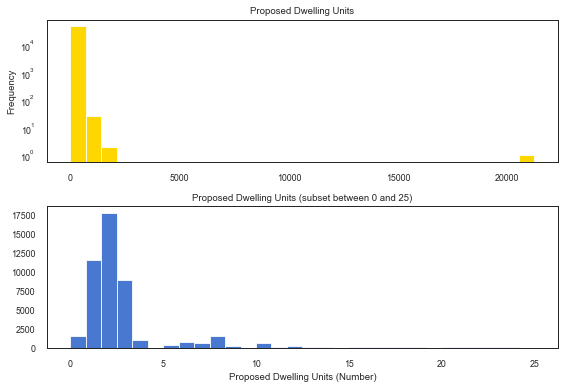

In [318]:
# Histogram of Proposed Height. 
fig,ax = plt.subplots(2,1, sharey=True)
plt.subplot(2,1,1)
ax = data['Proposed Dwelling Units'].plot(kind='hist', bins=30, color='gold', logy=True)
ax.set_title('Proposed Dwelling Units')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Proposed Dwelling Units'].hist(bins=30, range=(0,25))
ax1.set_title('Proposed Dwelling Units (subset between 0 and 25)')
ax1.set_xlabel('Proposed Dwelling Units (Number)')
ax1.grid(False)

plt.tight_layout()
pd.DataFrame((data['Proposed Dwelling Units']).describe()).round(1)

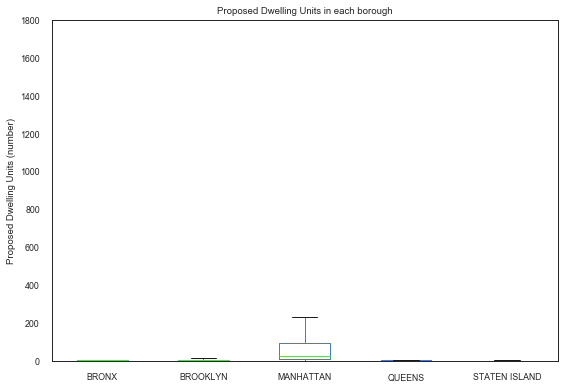

In [319]:
# Boxplot of Proposed Dwelling Units in each borough. 
ax = data.boxplot(column='Proposed Dwelling Units', by='Borough')

# ax = sns.boxplot(data=data,x='Borough', y='Proposed Dwelling Units')
ax.set(ylim=(0,1800))
ax.set_xlabel('')
ax.set_ylabel('Proposed Dwelling Units (number)')
ax.set_title('Proposed Dwelling Units in each borough')
plt.suptitle('')
ax.grid(False)
plt.tight_layout()

/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2000)

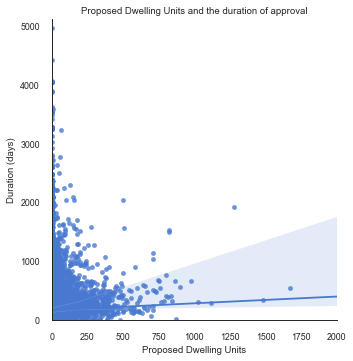

In [320]:
# scatterplot of proposed dwelling units and duration.

sns.lmplot(x='Proposed Dwelling Units', y='Duration', data=data)
plt.title('Proposed Dwelling Units and the duration of approval')
plt.ylabel('Duration (days)')
plt.ylim(0,5100)
plt.xlim(0,2000)

In [321]:
data.head(2)

,Unnamed: 0,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Fully Paid,Approved,Total Est. Fee,Proposed Zoning Sqft,...,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration,Z_score
0,0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2019-04-09,243.00,2700,...,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158.0,-0.035313
1,1,BROOKLYN,OTHERS,Y,RA,N,2012-03-27,2013-03-14,52167.26,161567,...,Other,NaN,NaN,MX-8,GW,N,198951,NaT,352.0,0.711858


### Categorical variables that have multiple categories 

#### How to visualize the categorigal variables that have too many categories for a bar chart or box plot?

Zoning, Special Districts and Proposed Occupany variables have multiple categoris each, ranging from 8 (Special District 2) to 43 (Proposed Occupancy) to 164 (Zoning Dist1) and anything in between. 

In [322]:
data['Proposed Occupancy'].unique()

array(['R-3', 'Other', 'U', 'R-2', 'E', 'M', 'S-2', 'J-3', 'B', 'B-2',
       'J-2', 'J-0', 'C', 'RES', nan], dtype=object)

Text(0,0.5,'Days')

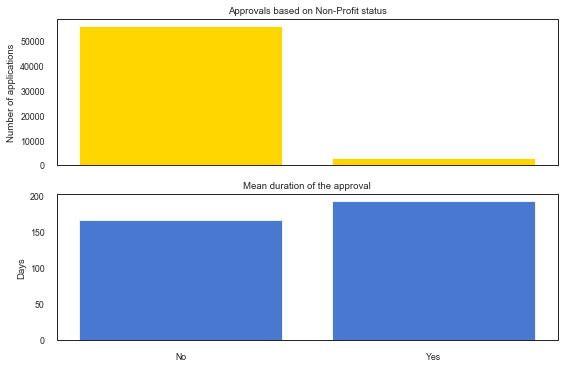

In [323]:
#bar chart of the Non-profit category.

fig, (ax1,ax2) = plt.subplots(2, sharex=True)

ngo=(data.groupby('Non-Profit')[['Approved','Duration']].
agg({'Approved':'count', 'Duration':'mean'}))

ax1.bar(ngo.index, ngo['Approved'], color='gold')
ax1.set_title('Approvals based on Non-Profit status')
ax1.set_ylabel('Number of applications')

ax2.bar(ngo.index, ngo['Duration'])
ax2.set_title('Mean duration of the approval')
ax2.set_xticklabels(['No','Yes'], rotation=360)
ax2.set_ylabel('Days')

# clarify the title and other a box plot.


,Total_Construction_Floor_Area
count,59076.0
mean,13557.1
std,70007.6
min,0.0
25%,2319.0
50%,3453.0
75%,5481.2
max,7142400.0


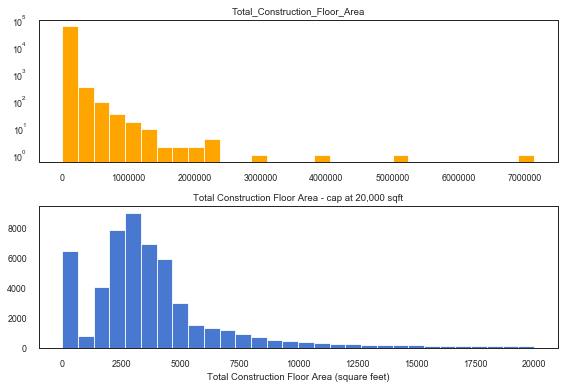

In [324]:
# Histogram of Total Construction Floor Area. 

fig,ax = plt.subplots(2,1)

plt.subplot(2,1,1)
ax = data['Total_Construction_Floor_Area'].hist(bins=30, color='orange')
ax.set_title('Total_Construction_Floor_Area')
ax.set_yscale('log')
# ax.set_xlabel('Total_Construction_Floor_Area (square feet)')
ax.grid(False)

plt.subplot(2,1,2)
ax1 = data['Total_Construction_Floor_Area'].hist(bins=30,  range=(0,20000))
ax1.set_title('Total Construction Floor Area - cap at 20,000 sqft')
ax1.set_xlabel('Total Construction Floor Area (square feet)')
ax1.grid(False)

plt.tight_layout()
pd.DataFrame((data['Total_Construction_Floor_Area']).describe()).round(1)


/Users/anushavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2000000)

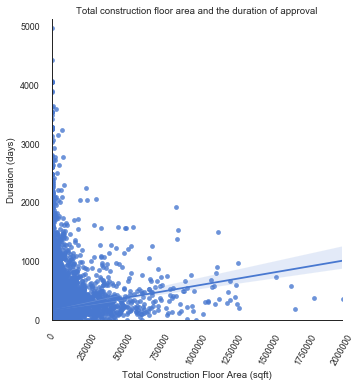

In [325]:
# scatterplot of Total construction floor area and duration.

sns.lmplot(x='Total_Construction_Floor_Area', y='Duration', data=data)
plt.title('Total construction floor area and the duration of approval')
plt.ylabel('Duration (days)')
plt.xlabel('Total Construction Floor Area (sqft)')
plt.ylim(0,5100)
plt.xticks(rotation=60)
plt.xlim(0,2000000)

### Further analysis of the dependent variable and explanatory variables.

Heatmap of all variables and correlations.

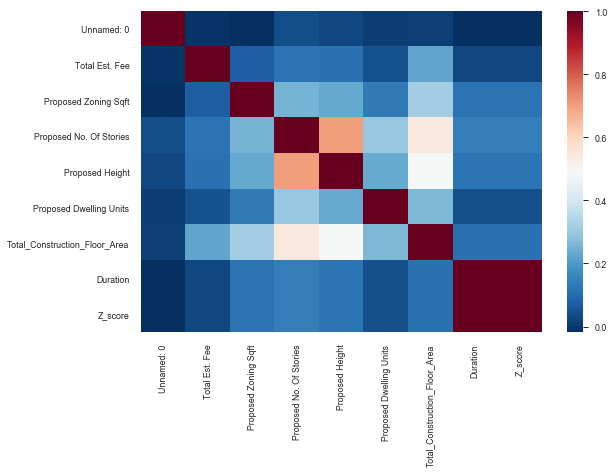

In [326]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdBu_r")

,Duration
count,59076.000000
mean,167.168969
std,259.648127
min,1.000000
25%,25.000000
50%,83.000000
75%,201.000000
max,4959.000000


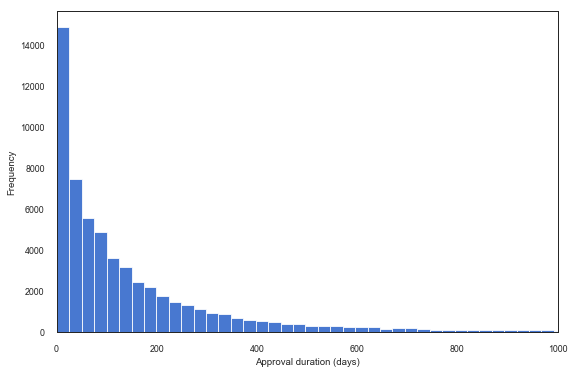

In [327]:
# Create a histogram of duration and include a statistical analysis.
data['Duration'].plot(kind='hist', bins = 200)
plt.xlim(0,1000)
plt.xlabel('Approval duration (days)')
pd.DataFrame(data['Duration'].describe())

Text(0.5,1,'Mean and median duration by borough')

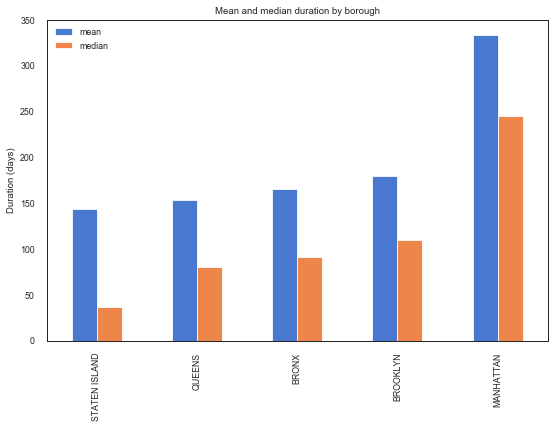

In [328]:
ax = (data.groupby('Borough')['Duration'].agg(['mean','median'])
      .sort_values(by='mean').plot(kind='bar'))
ax.set_xlabel('')
ax.set_ylabel('Duration (days)')
ax.set_title('Mean and median duration by borough')

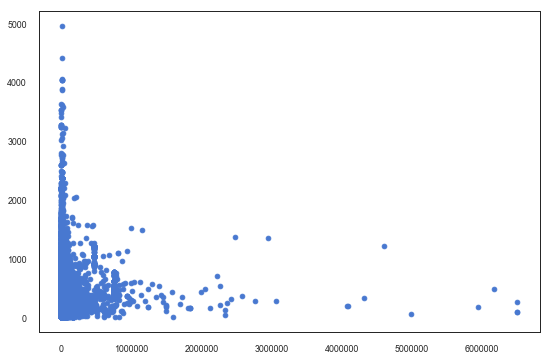

In [329]:
# scatter plot of Proposed Zoning Sqft (x) Duration (y) 
plt.scatter(x=data['Proposed Zoning Sqft'], y=data['Duration'])

### Selecting outliers

Selecting outliers based on the Duration variable. Applying a filter to
select values that are +- 3 standard deviation in this variable. Total number of outliers is
1242 data points, which is 2.1% of the total data.

In [330]:
from scipy.stats import zscore

In [331]:
data['Z_score'] = zscore(data['Duration'])

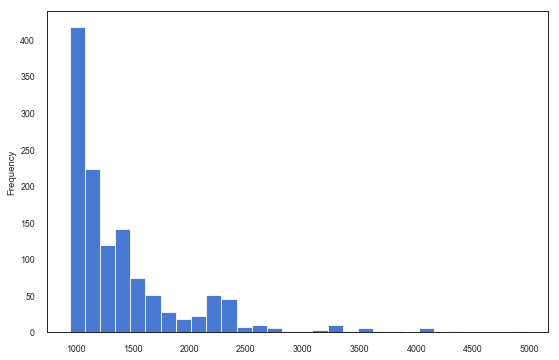

In [332]:
data[data['Z_score'] > 3]['Duration'].plot(kind='hist', bins=30)
# x axis labels add

Text(0,0.5,'Number of applications')

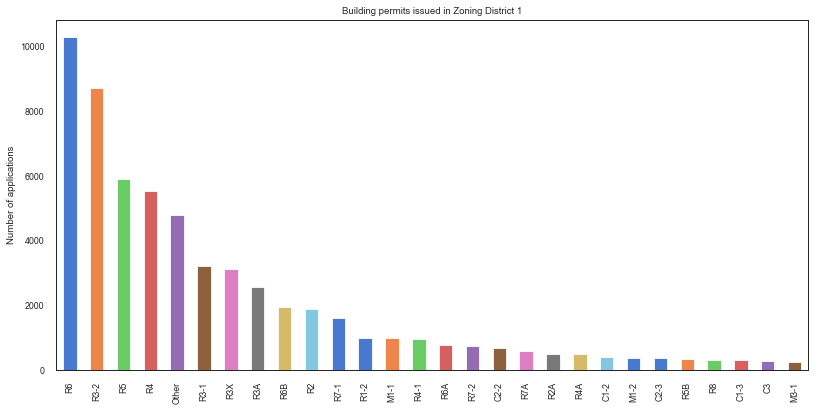

In [333]:
# bar plot of the new zoning district 1 values
ax = data['Zoning Dist1'].value_counts().plot(kind='bar',figsize=(12,6))
ax.set_title('Building permits issued in Zoning District 1')
ax.set_ylabel('Number of applications')

In [334]:
! pip install squarify

You should consider upgrading via the 'pip install --upgrade pip' command.


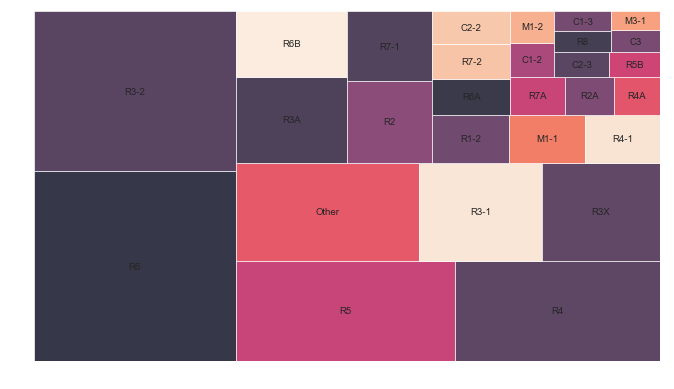

In [335]:
import squarify
ax = squarify.plot(sizes=data['Zoning Dist1'].value_counts().values, 
              label=data['Zoning Dist1'].value_counts().index, alpha=.8)
plt.axis('off')
ax.figure.set_size_inches(10,6)

### How to deal with these 4 zoning variables that have very few valid cells 
#### (especially Zoning Dist3 and Special District 2)

Zoning Dist2 -- 4720 non-null object

Zoning Dist3 -- 202 non-null object

Special District 1 -- 5518 non-null object

Special District 2 -- 600 non-null object


### EVERYTHING IS LOST!!!